**IMPORT LIBRARY YANG DIBUTUHKAN**

In [1]:
# Library untuk load data
import pandas as pd

# Library untuk preprocessing data
import numpy as np

# Library untuk melakukan visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk pemodelan data dan evalusasi
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

# Library untuk membuat slider input
import ipywidgets as widgets
from IPython.display import display, clear_output

In [2]:
# Load data
df = pd.read_excel('DATA RUMAH.xlsx')

# Melihat type data dari setiap field
df.info()

# Melihat jumlah data dan field
print("Shape of data:")
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.2+ KB
Shape of data:
(1010, 8)


In [3]:
# Melihat dan analisa isi datanya untuk mengambil keputusan selanjutnya
df.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3


In [4]:
# Mengecek apakah ada data yang duplicate
print("Jumlah data duplicated:", df.duplicated().sum(), end="")

# Menampilkan jumlah nilai yang hilang untuk setiap kolom
df.isna().sum()

Jumlah data duplicated: 0

NO            0
NAMA RUMAH    0
HARGA         0
LB            0
LT            0
KT            0
KM            0
GRS           0
dtype: int64

**PREPROCESSING DATA**

In [5]:
# Hapus kolom yang tidak dipakai
df.drop(['NO', 'NAMA RUMAH'], axis=1, inplace=True)

# Ganti nama kolom dengan nama mudah dipahami
df.rename(columns={
    'LB': 'luas_bangunan',
    'LT': 'luas_tanah',
    'KT': 'kamar_tidur',
    'KM': 'kamar_mandi',
    'GRS': 'garasi',
    'HARGA': 'harga_rumah'
}, inplace=True)

# Tampilkan data setelah kolom yang tidak dipakai dihapus dan perubahan nama field
df.head()


,harga_rumah,luas_bangunan,luas_tanah,kamar_tidur,kamar_mandi,garasi
0,3800000000,220,220,3,3,0
1,4600000000,180,137,4,3,2
2,3000000000,267,250,4,4,4
3,430000000,40,25,2,2,0
4,9000000000,400,355,6,5,3


In [6]:
# melihat ringkasan statistik dari dataframe setelah melakukan perubahan
df.describe()

,harga_rumah,luas_bangunan,luas_tanah,kamar_tidur,kamar_mandi,garasi
count,1.010000e+03,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,7.628987e+09,276.539604,237.432673,4.668317,3.607921,1.920792
std,7.340946e+09,177.864557,179.957604,1.572776,1.420066,1.510998
min,4.300000e+08,40.000000,25.000000,2.000000,1.000000,0.000000
25%,3.262500e+09,150.000000,130.000000,4.000000,3.000000,1.000000
50%,5.000000e+09,216.500000,165.000000,4.000000,3.000000,2.000000
75%,9.000000e+09,350.000000,290.000000,5.000000,4.000000,2.000000
max,6.500000e+10,1126.000000,1400.000000,10.000000,10.000000,10.000000


**VISUALISASI DATA**

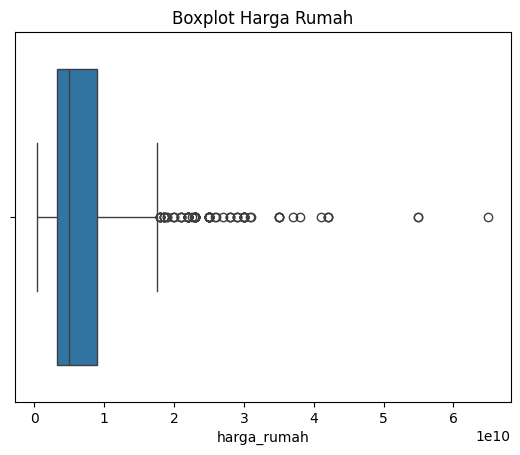

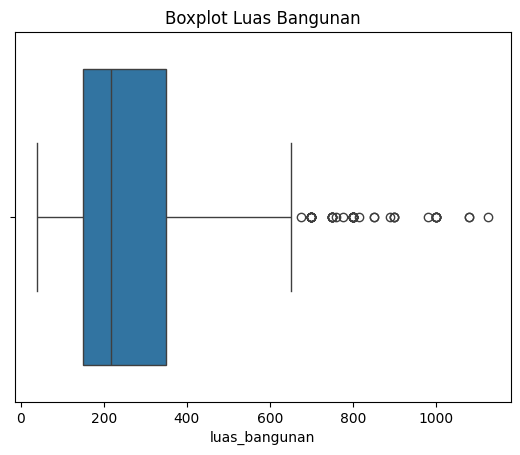

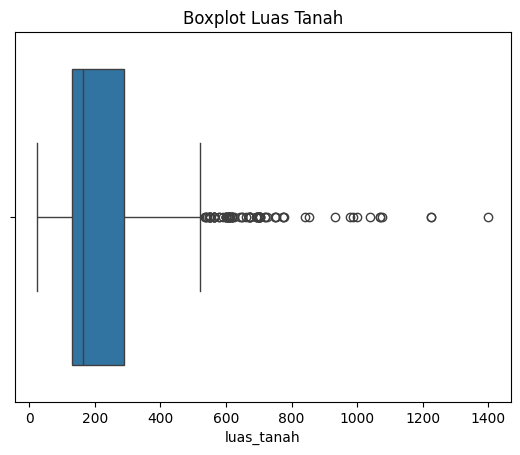

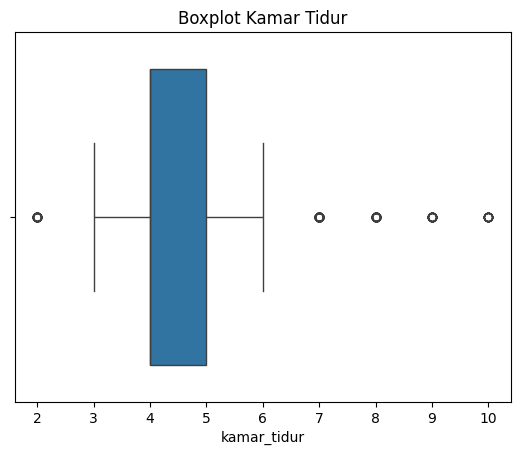

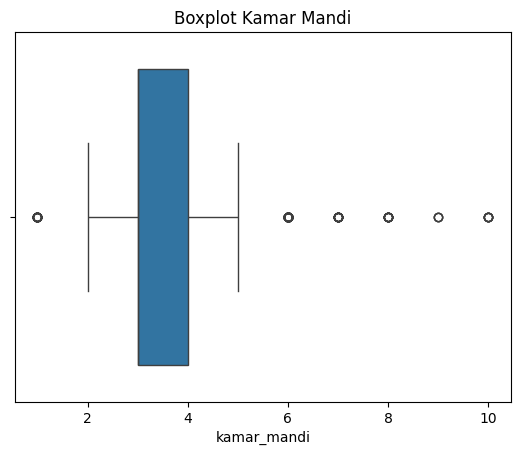

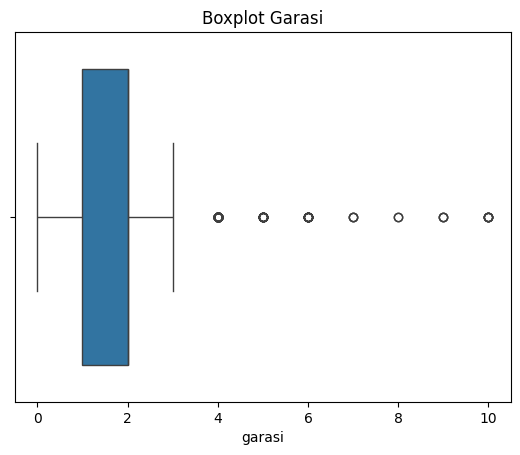

In [ ]:
# Visualisasi boxplot untuk kolom HARGA
sns.boxplot(x='harga_rumah', data=df)
plt.title('Boxplot Harga Rumah')
plt.show()

# Visualisasi boxplot untuk kolom Luas Bangunan
sns.boxplot(x='luas_bangunan', data=df)
plt.title('Boxplot Luas Bangunan')
plt.show()

# Visualisasi boxplot untuk kolom Luas Tanah
sns.boxplot(x='luas_tanah', data=df)
plt.title('Boxplot Luas Tanah')
plt.show()

# Visualisasi boxplot untuk kolom Kamar Tidur
sns.boxplot(x='kamar_tidur', data=df)
plt.title('Boxplot Kamar Tidur')
plt.show()

# Visualisasi boxplot untuk kolom Kamar Mandi
sns.boxplot(x='kamar_mandi', data=df)
plt.title('Boxplot Kamar Mandi')
plt.show()

# Visualisasi boxplot untuk kolom Garasi
sns.boxplot(x='garasi', data=df)
plt.title('Boxplot Garasi')
plt.show()
# Tujuannya melihat apakah ada data dari semua field yang jauh lebih tinggi atau lebih rendah
# dari sebagian besar data (outliers), serta rentang harga yang paling umum (mean)

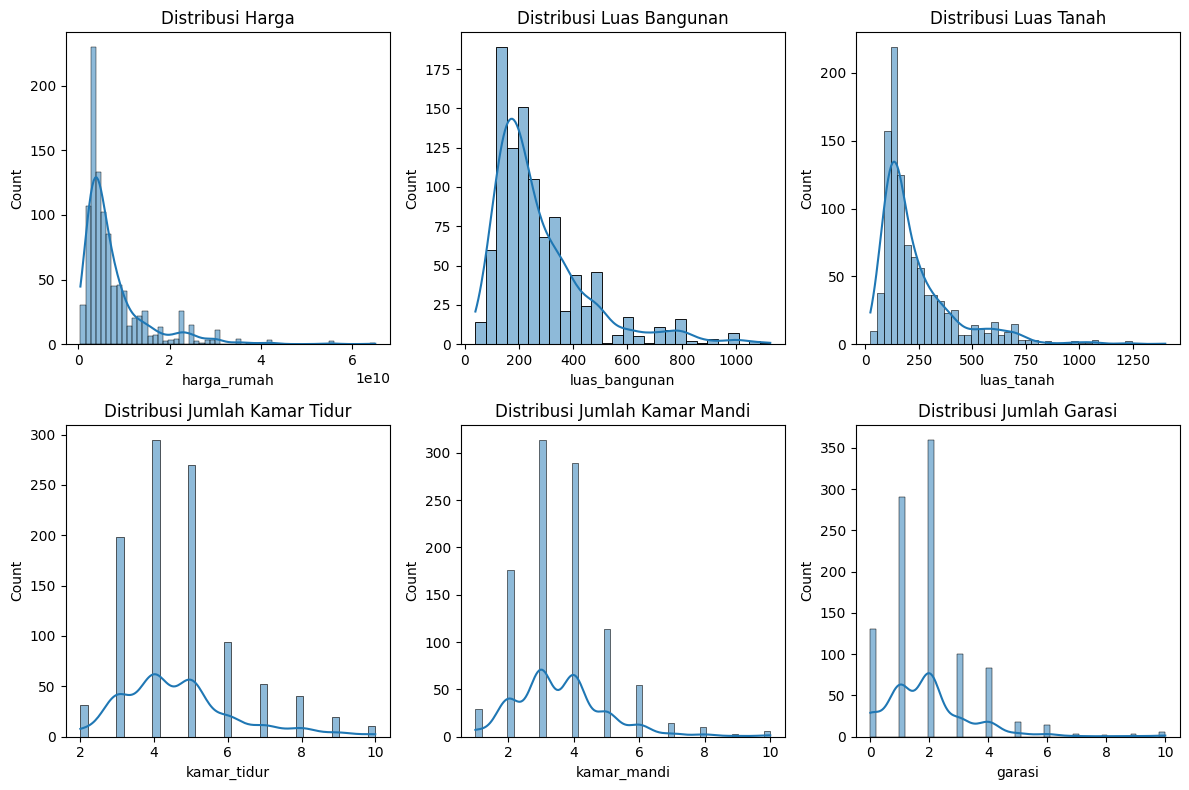

In [ ]:
# Untuk melihat jumlah data yang kembar (untuk melihat data paling banyak dan sedikit)
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sns.histplot(df['harga_rumah'], kde=True)
plt.title('Distribusi Harga')

plt.subplot(2, 3, 2)
sns.histplot(df['luas_bangunan'], kde=True)
plt.title('Distribusi Luas Bangunan')

plt.subplot(2, 3, 3)
sns.histplot(df['luas_tanah'], kde=True)
plt.title('Distribusi Luas Tanah')

plt.subplot(2, 3, 4)
sns.histplot(df['kamar_tidur'], kde=True)
plt.title('Distribusi Jumlah Kamar Tidur')

plt.subplot(2, 3, 5)
sns.histplot(df['kamar_mandi'], kde=True)
plt.title('Distribusi Jumlah Kamar Mandi')

plt.subplot(2, 3, 6)
sns.histplot(df['garasi'], kde=True)
plt.title('Distribusi Jumlah Garasi')
plt.tight_layout()
plt.show()

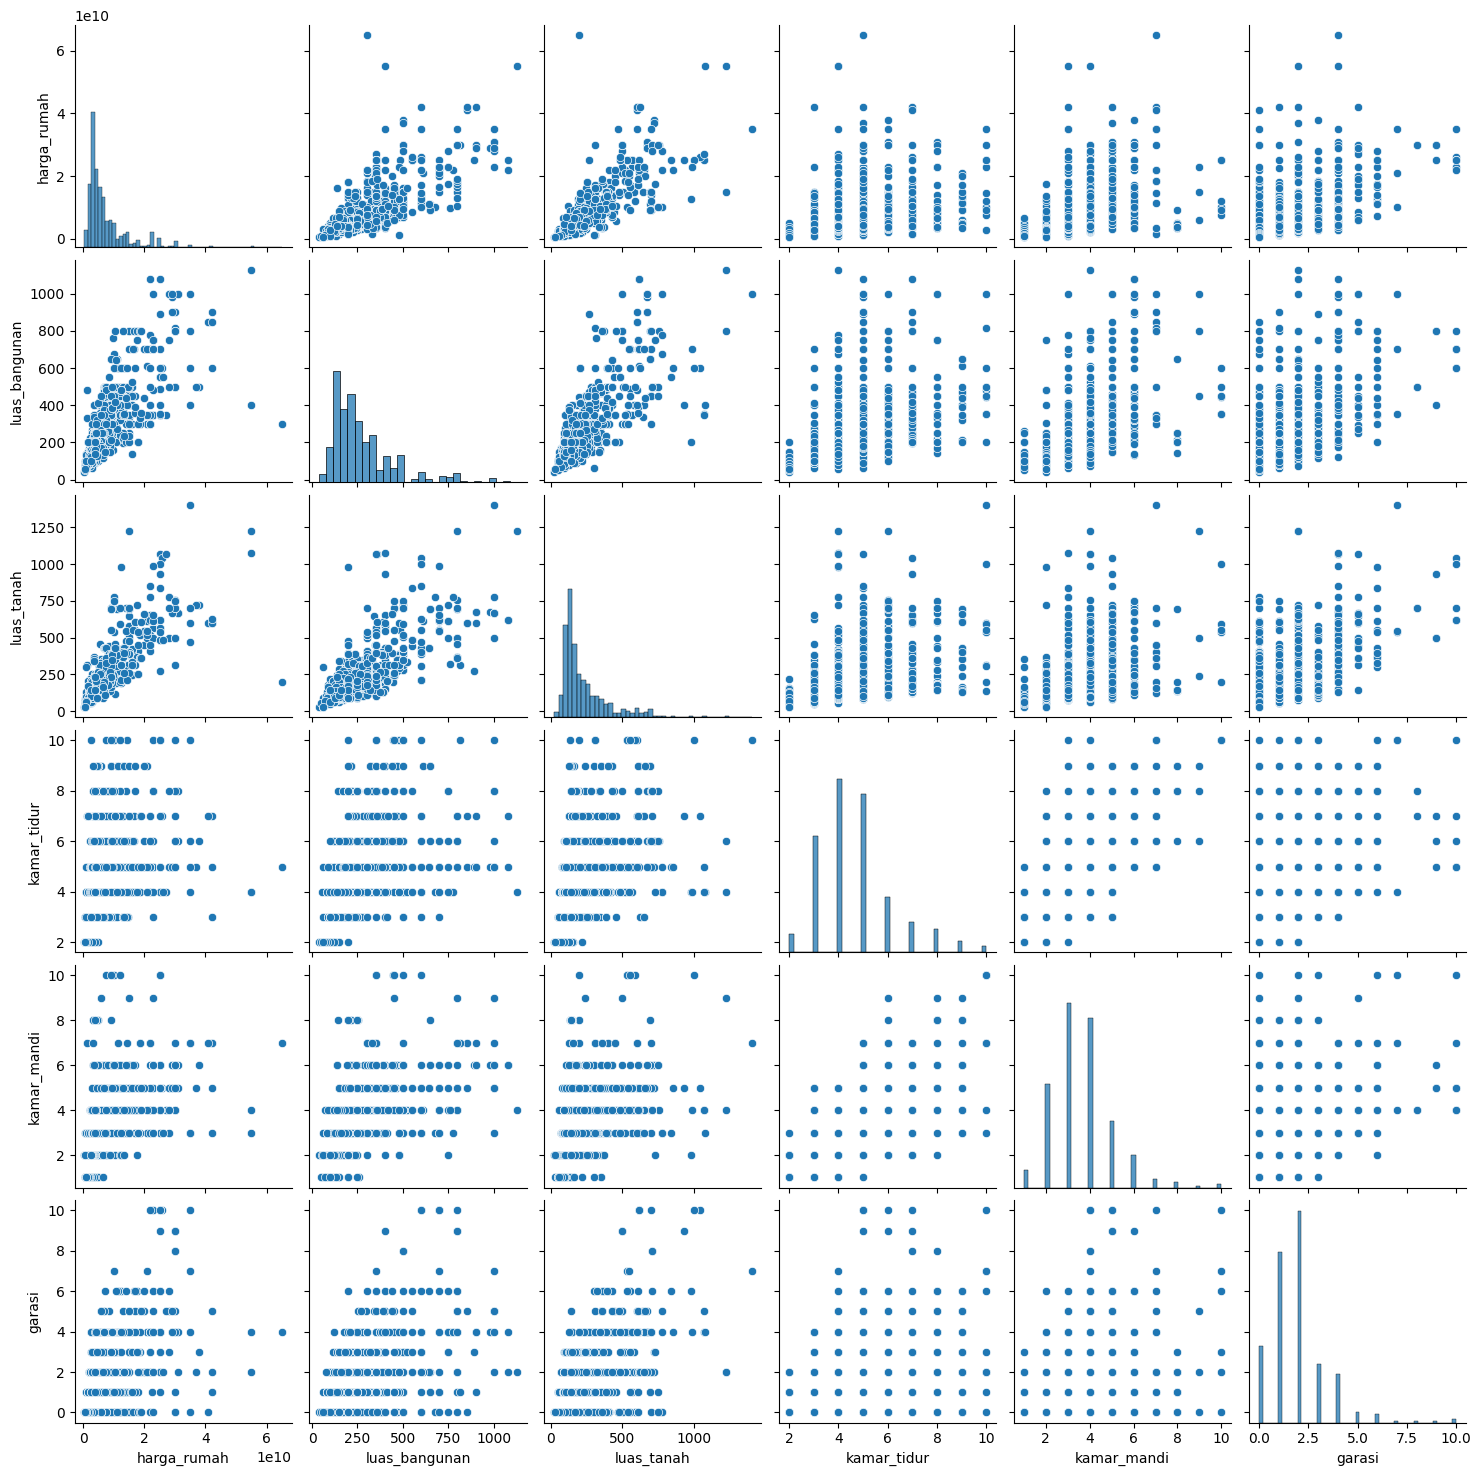

In [ ]:
# Visualisasi hubungan antara fitur menggunakan scatter plot
sns.pairplot(df)
plt.show()

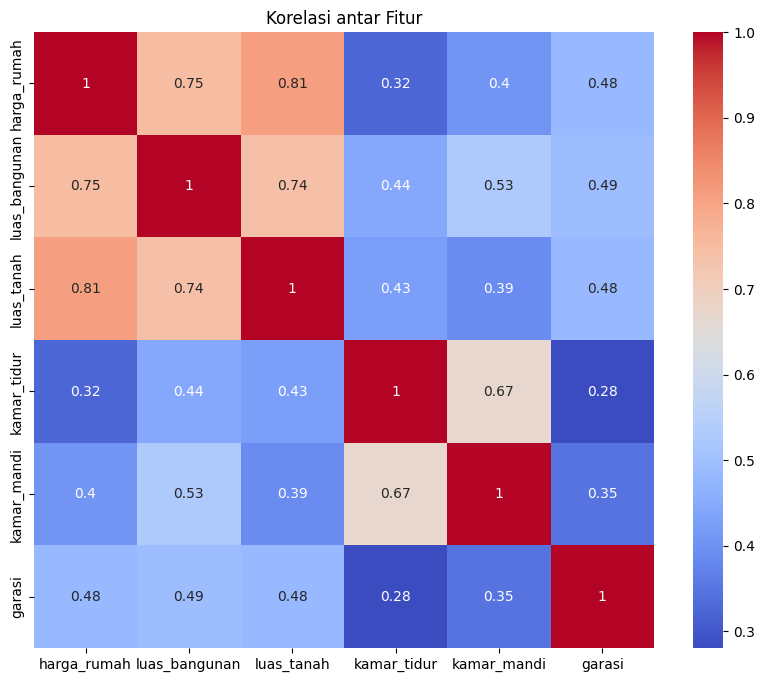

In [ ]:
# Visualisasi heatmap untuk korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi antar Fitur')
plt.show()
# Bertujuan untuk memahami hubungan linear antara fitur-fitur dalam dataset.
# Ini membantu dalam mengidentifikasi seberapa kuat fitur-fitur tersebut berkorelasi satu sama lain

**MODELING**

In [ ]:
# Memisahkan fitur dan target
X = df.drop('harga_rumah', axis=1)
y = df['harga_rumah']

# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

# Memprediksi pada testing set
y_pred = model.predict(X_test)

**EVALUASI MODEL**

Mean Squared Error: 1.0675729074057431e+19
R-squared: 0.7713134894077545
Mean Absolute Error: 1980345761.1519253
Root Mean Squared Error: 3267373421.2754793




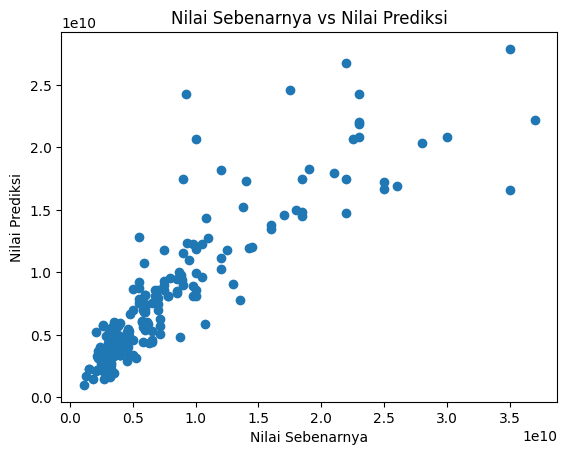

In [ ]:
# Menghitung Mean Squared Error (MSE) dan R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Menghitung Root Mean Squared Error (RMSE)
rmse = math.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print("\n")

# Menampilkan plot antara nilai prediksi dan nilai sebenarnya
plt.scatter(y_test, y_pred)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Sebenarnya vs Nilai Prediksi')
plt.show()

**TESTING**

In [ ]:
# Definisikan fungsi untuk memprediksi harga berdasarkan fitur yang dipilih
def predict_house_price(luas_bangunan, luas_tanah, kamar_tidur, kamar_mandi, garasi):
    # Lakukan prediksi harga menggunakan model regresi linier
    input_data = pd.DataFrame([[luas_bangunan, luas_tanah, kamar_tidur, kamar_mandi, garasi]],
                              columns=X.columns)  # Memastikan nama kolom sesuai dengan data latih
    predicted_price = model.predict(input_data)

    # Tampilkan hasil prediksi
    print(f'Prediksi harga rumah adalah RP. {predicted_price[0]:,.0f}')

# Buat slider untuk setiap fitur dengan format bacaan float yang disesuaikan
slider_luas_bangunan = widgets.FloatSlider(value=250, min=0, max=500, step=10, description='Luas Bangunan:', readout_format='.2f')
slider_luas_tanah = widgets.FloatSlider(value=500, min=0, max=1000, step=10, description='Luas Tanah:', readout_format='.2f')
slider_kamar_tidur = widgets.IntSlider(value=5, min=1, max=10, step=1, description='Kamar Tidur:')
slider_kamar_mandi = widgets.IntSlider(value=2, min=1, max=5, step=1, description='Kamar Mandi:')
slider_garasi = widgets.IntSlider(value=2, min=0, max=5, step=1, description='Garasi:')

# Fungsi untuk menampilkan prediksi harga saat nilai slider berubah
def update_prediction(luas_bangunan, luas_tanah, kamar_tidur, kamar_mandi, garasi):
    predict_house_price(luas_bangunan, luas_tanah, kamar_tidur, kamar_mandi, garasi)

# Buat tampilan interaktif dengan menggunakan fungsi update_prediction
widgets.interactive(update_prediction, luas_bangunan=slider_luas_bangunan, luas_tanah=slider_luas_tanah, kamar_tidur=slider_kamar_tidur, kamar_mandi=slider_kamar_mandi, garasi=slider_garasi)

interactive(children=(FloatSlider(value=250.0, description='Luas Bangunan:', max=500.0, step=10.0), FloatSlide…

In [ ]:
# Memprediksi pada testing set
y_pred = model.predict(X_test)

# Menghitung koefisien determinasi (R^2) sebagai "akurasi"
accuracy = model.score(X_test, y_test) * 100

# Menampilkan "akurasi" dalam persentase
print("Akurasi Prediksi: %.2f%%" % accuracy)

Akurasi Prediksi: 77.13%
